In [1]:
import pandas as pd
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np
filename = 'C://train_r//data//data1_2//data1-2(개별질병).csv'

data = pd.read_csv(filename)
data

,label,OAA,OAB,OBA,OBB,OBC,OBD,OBE,OCA,OCB,...,IFC,IFD,IGA,IGB,IHA,IHB,IIA,IIB,IJA,IJB
0,기타질병,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,기타질병,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,비브리오병,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,기타질병,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,기타질병,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,기타질병,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
763,스쿠티카병,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,기타질병,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,스쿠티카병,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
data = data.fillna(0)
data = data.replace('Y', 1)
data.label.replace(['기타질병', '비브리오병', '연쇄구균병', '스쿠티카병', '정상', '활주세균병', '에드워드병', 'VHSV'], [0, 1, 2, 3, 4, 5, 6, 7], inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   767 non-null    int64  
 1   OAA     767 non-null    int64  
 2   OAB     767 non-null    int64  
 3   OBA     767 non-null    int64  
 4   OBB     767 non-null    int64  
 5   OBC     767 non-null    int64  
 6   OBD     767 non-null    int64  
 7   OBE     767 non-null    int64  
 8   OCA     767 non-null    int64  
 9   OCB     767 non-null    float64
 10  OCC     767 non-null    int64  
 11  OCD     767 non-null    int64  
 12  OCE     767 non-null    int64  
 13  ODA     767 non-null    int64  
 14  ODB     767 non-null    float64
 15  OEA     767 non-null    int64  
 16  OEB     767 non-null    int64  
 17  OFA     767 non-null    int64  
 18  OFB     767 non-null    int64  
 19  OGA     767 non-null    int64  
 20  OGB     767 non-null    float64
 21  OHA     767 non-null    int64  
 22  OH

In [3]:
train = data.sample(frac=0.7, random_state=786)
test = data.drop(train.index)
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

In [4]:
from pycaret.classification import *
setup_clf = setup(data=train, target='label')

,Description,Value
0,session_id,4810
1,Target,label
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(537, 57)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,45
8,Ordinal Features,False
9,High Cardinality Features,False


In [16]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [5]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3948,0.0000,0.2629,0.3473,0.3361,0.1725,0.1855,0.0160
ridge,Ridge Classifier,0.3861,0.0000,0.2422,0.3301,0.3218,0.1586,0.1731,0.0030
gbc,Gradient Boosting Classifier,0.3839,0.0000,0.2819,0.3124,0.3332,0.1710,0.1811,0.0830
lr,Logistic Regression,0.3838,0.0000,0.2524,0.3338,0.3344,0.1594,0.1697,0.4390
et,Extra Trees Classifier,0.3707,0.0000,0.2581,0.3070,0.3214,0.1534,0.1621,0.0330
knn,K Neighbors Classifier,0.3657,0.0000,0.2432,0.3081,0.3135,0.1392,0.1510,0.2170
rf,Random Forest Classifier,0.3657,0.0000,0.2519,0.2966,0.3111,0.1426,0.1523,0.0420
dt,Decision Tree Classifier,0.3627,0.0000,0.2555,0.3087,0.3171,0.1417,0.1502,0.0030
lda,Linear Discriminant Analysis,0.3491,0.0000,0.2246,0.2816,0.2997,0.1309,0.1388,0.0040
ada,Ada Boost Classifier,0.3331,0.0000,0.1968,0.1668,0.2064,0.0514,0.0855,0.0150


In [6]:
LGBM = create_model('lightgbm', cross_validation=False)
ridge = create_model('ridge', cross_validation=False)
gbc = create_model('gbc', cross_validation=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4198,0,0.2363,0.4645,0.3912,0.2347,0.2575


In [7]:
tuned_LGBM = tune_model(LGBM, optimize='Accuracy')
tuned_ridge = tune_model(ridge, optimize='Accuracy')
tuned_gbc = tune_model(gbc, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3947,0.0000,0.1984,0.2571,0.2984,0.1755,0.1971
1,0.4474,0.0000,0.2960,0.5032,0.3933,0.2312,0.2531
2,0.4737,0.0000,0.3377,0.4386,0.4301,0.2956,0.3047
3,0.3947,0.0000,0.2632,0.3216,0.3283,0.1481,0.1653
4,0.3947,0.0000,0.2794,0.4353,0.3608,0.1778,0.1884
5,0.4054,0.0000,0.2509,0.3622,0.3288,0.1744,0.1939
6,0.3514,0.0000,0.2044,0.2596,0.2898,0.1048,0.1110
7,0.4324,0.0000,0.3266,0.5482,0.3994,0.2214,0.2409
8,0.2973,0.0000,0.2157,0.2365,0.2446,0.0302,0.0340


In [9]:
blender_specific = blend_models(estimator_list=[tuned_LGBM, tuned_ridge, tuned_gbc], method='hard', optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4211,0.0000,0.2553,0.4398,0.3470,0.2083,0.2286
1,0.4211,0.0000,0.2722,0.3127,0.3419,0.1907,0.2136
2,0.3947,0.0000,0.2833,0.2970,0.3379,0.1915,0.1987
3,0.3684,0.0000,0.2077,0.2586,0.2892,0.1032,0.1154
4,0.3684,0.0000,0.2278,0.2610,0.2979,0.1396,0.1484
5,0.4595,0.0000,0.2880,0.4014,0.3725,0.2563,0.2852
6,0.3514,0.0000,0.2044,0.2750,0.2916,0.1039,0.1112
7,0.4054,0.0000,0.2710,0.4570,0.3541,0.1794,0.1960
8,0.2973,0.0000,0.2111,0.1804,0.2220,0.0370,0.0409


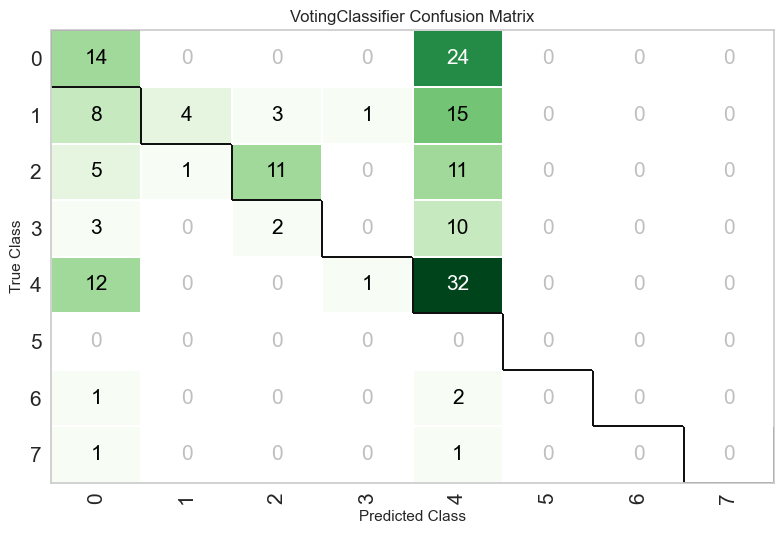

In [10]:
blender_specific = blend_models(estimator_list=[tuned_LGBM, tuned_ridge, tuned_gbc], optimize='Accuracy')

plot_model(blender_specific, plot='confusion_matrix')

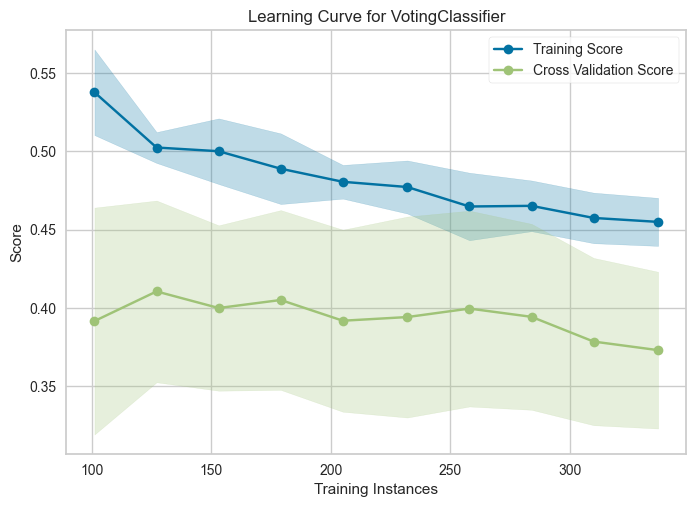

In [12]:
plot_model(blender_specific, plot='learning')

In [14]:
#마지막 학습
final_model = finalize_model(blender_specific)

In [15]:
#예측
pred = predict_model(final_model, data = test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.4130,0,0.2689,0.4214,0.3644,0.2260,0.2456
